## 0. 데이터 로드, 전처리

<데이터 목록>
- 서울특별시_광진구_도시공원정보_20250310.csv
- 서울특별시_광진구_인구현황_20231231.xlsx
- 서울특별시 광진구_연령별인구현황_20241028.xlsx
- 서울특별시 광진구_기초생활보장수급자현황_20250131.csv
- 서울시 상권분석서비스(소득소비-행정동).xlsx


### 0.1 데이터 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.font_manager as fm
import matplotlib as mpl

In [2]:
park_file = 'data/서울특별시_광진구_도시공원정보_20250310.csv'
park_data = pd.read_csv(park_file)
park_data.head(2)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자
0,11215-10510,성화공원,어린이공원,NaN,서울특별시 광진구 자양동 199-4,37.536207,127.061859,253.0,NaN,조합놀이대,NaN,NaN,NaN,1979-09-15,서울특별시 광진구청,02-450-7775,2025-03-10
1,11215-10511,양마장공원,어린이공원,NaN,서울특별시 광진구 자양동 689-6,37.530871,127.088727,1113.0,NaN,"조합놀이대, 그네, 흔들놀이기구",NaN,NaN,NaN,1982-03-09,서울특별시 광진구청,02-450-7775,2025-03-10


In [3]:
age_file = 'data/서울특별시 광진구_연령별인구현황_20241028.xlsx'
age_data = pd.read_excel(age_file)
age_data.head(5)

,광진구,화양동,군자동,중곡1동,중곡2동,중곡3동,중곡4동,능동,구의1동,구의2동,구의3동,광장동,자양1동,자양2동,자양3동,자양4동,합계
0,0~4세,164,318,264,302,272,454,220,365,528,640,660,293,531,798,370,6179
1,5~9세,162,396,256,489,288,525,229,467,772,867,1716,398,641,1053,425,8684
2,10~14세,201,462,327,619,355,731,257,542,1017,1063,2752,613,801,1155,433,11328
3,15~19세,784,606,346,624,412,938,268,658,1164,1217,2551,806,842,1230,560,13006
4,20~24세,6565,2401,892,1111,779,1455,790,1646,1350,1589,1968,1481,1203,1590,1794,26614


In [4]:
pop_file = 'data/서울특별시_광진구_인구현황_20231231.xlsx'
pop_data = pd.read_excel(pop_file)
pop_data.head(5)

,행정기관,계,인구수(남),인구수(여),지역(구성비),구성비(남),구성비(여),성비,세대수,세대당인구
0,광진구,335554,161277,174277,100.00,48.06,51.94,92.54,170077,1.97
1,중곡제1동,15239,7215,8024,4.54,2.15,2.39,89.92,8651,1.76
2,중곡제2동,20521,9639,10882,6.12,2.87,3.24,88.58,10572,1.94
3,중곡제3동,15727,7761,7966,4.69,2.31,2.37,97.43,8518,1.85
4,중곡제4동,27594,13441,14153,8.22,4.01,4.22,94.97,13066,2.11


In [5]:
income_file = 'data/서울시 상권분석서비스(소득소비-행정동).xlsx'
income_data = pd.read_excel(income_file)
income_data.head(5)

,기준_년분기_코드,행정동_코드,행정동_코드_명,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,교육_지출_총금액,유흥_지출_총금액,여가_문화_지출_총금액,기타_지출_총금액,음식_지출_총금액
0,20191,11110530,사직동,5208463,9,31889341000,1238314000,158974000,60281000,586427000,188458000,169234000,293797000,1241791000,23670438000,4281627000
1,20191,11110615,종로1?2?3?4가동,3350350,7,77584610000,3618998000,7478066000,861970000,4123252000,3236609000,2062644000,2398515000,13520753000,23729021000,16554782000
2,20191,11110650,혜화동,3472006,7,7826497000,1354887000,215665000,77222000,1129580000,20145000,195279000,415196000,565923000,361926000,3490674000
3,20191,11110680,창신2동,2179485,5,670987000,143195000,23323000,11149000,142754000,945000,0,17411000,32513000,18104000,281593000
4,20191,11140520,소공동,5583264,9,1018122360000,21939934000,79342000,398705000,1374288000,13670278000,412044000,200962000,965779543000,11607102000,2660162000


In [6]:
basiclive_file = 'data/서울특별시 광진구_기초생활보장수급자현황_20250131.csv'
basiclive_data = pd.read_csv(basiclive_file, encoding='euc-kr')
basiclive_data.head(5)

,시도,시군구,읍면동,합계가구수,합계수급권자수,일반수급자(소계)가구수,일반수급자(소계)수급권자수,일반수급자 가구수,일반수급자 수급권자수,일반수급자(조건부) 가구수,일반수급자(조건부) 수급권자수,일반수급자(특례) 가구수,일반수급자(특례) 수급권자수,일반수급자(기타) 가구수,일반수급자(기타) 수급권자수,시설수급자 가구수,시설수급자 수급권자수
0,서울특별시,광진구,광진구,68,69,2,3,2,3,0,0,0,0,0,0,66,66
1,서울특별시,광진구,화양동,642,769,641,768,511,608,128,158,2,2,0,0,1,1
2,서울특별시,광진구,군자동,767,959,764,956,648,803,113,149,3,4,0,0,3,3
3,서울특별시,광진구,중곡1동,755,1056,753,1054,595,801,154,249,4,4,0,0,2,2
4,서울특별시,광진구,중곡2동,843,1127,841,1125,656,834,181,287,4,4,0,0,2,2


### 0.2 데이터 전처리

In [7]:
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False

# 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'

광진구 행정동 수: 15
     ADM_NM    ADM_CD
1223   중곡4동  11050580
1242    광장동  11050630
1243   자양1동  11050640
1244   자양2동  11050650
1407    화양동  11050530
1408    군자동  11050540
1411   중곡1동  11050550
1413   중곡2동  11050560
1414   중곡3동  11050570
1415     능동  11050590
1428   구의1동  11050600
1429   구의3동  11050620
1441   자양3동  11050660
1448   자양4동  11050670
3124   구의2동  11050610


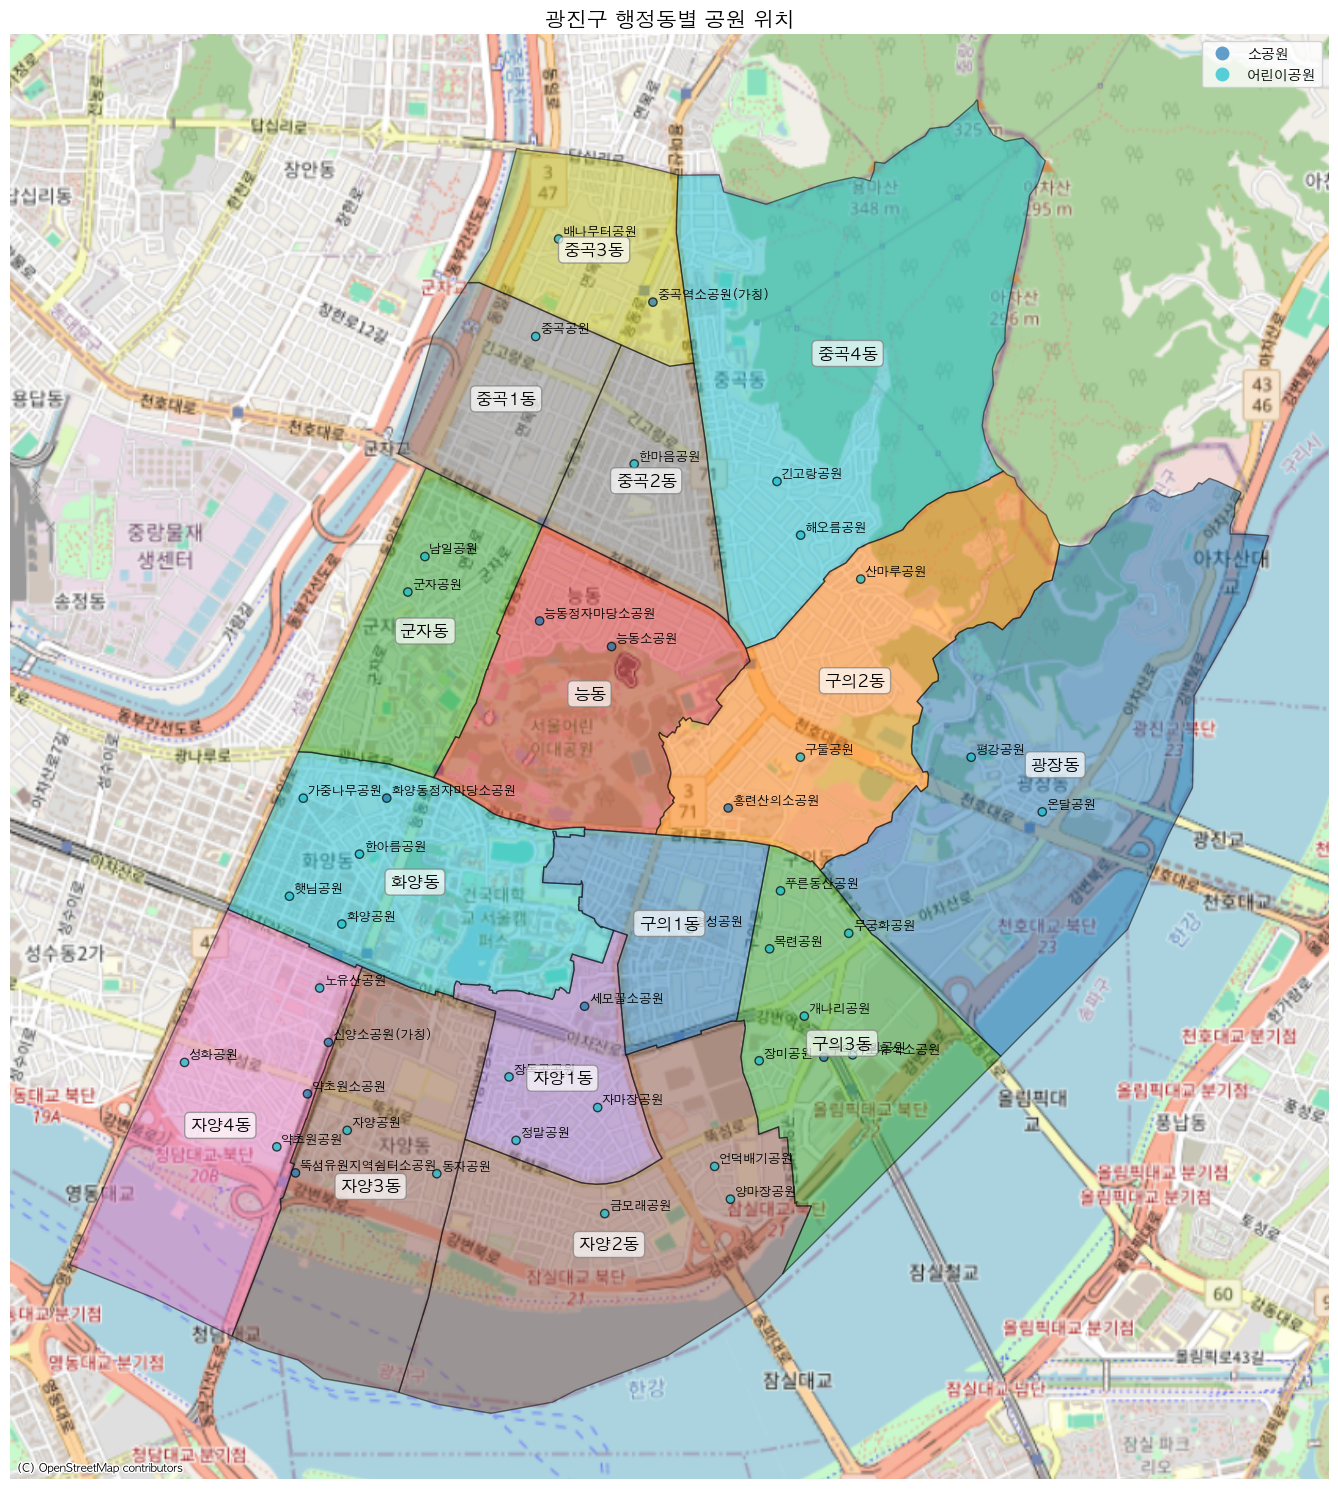

In [8]:
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx

# 1. 전국 행정동 경계 shp 파일 로드
shp_file = '/Users/jisu/Desktop/광진구 공모전/통계청_SGIS 행정구역 통계 및 경계_20240630/2. 경계/3. 2024년 2분기 기준 행정동 경계/bnd_dong_00_2024_2Q.shp'  # 실제 파일 경로로 수정
korea_districts = gpd.read_file(shp_file)

# 2. 광진구 행정동만 필터링 (ADM_CD가 111050으로 시작하는 행)
# ADM_CD를 문자열로 변환하여 광진구 코드로 시작하는지 확인
korea_districts['ADM_CD'] = korea_districts['ADM_CD'].astype(str)
gwangjin_districts = korea_districts[korea_districts['ADM_CD'].str.startswith('11050')]

print(f"광진구 행정동 수: {len(gwangjin_districts)}")
print(gwangjin_districts[['ADM_NM', 'ADM_CD']])

# 3. 공원 데이터를 GeoDataFrame으로 변환
geometry = [Point(xy) for xy in zip(park_data['경도'], park_data['위도'])]
park_gdf = gpd.GeoDataFrame(park_data, geometry=geometry, crs="EPSG:4326")

# 4. 좌표계 통일
if gwangjin_districts.crs != park_gdf.crs:
    gwangjin_districts = gwangjin_districts.to_crs(park_gdf.crs)

# 5. 시각화
fig, ax = plt.subplots(figsize=(15, 15))

# 행정동 경계 그리기 - 다른 색상으로 구분
gwangjin_districts.plot(ax=ax, alpha=0.5, edgecolor='black', column='ADM_NM', legend=True, categorical=True)

# 공원 종류별로 다른 색상 사용
park_gdf.plot(ax=ax,
              column='공원구분', legend=True, 
              categorical=True, marker='o',
              alpha=0.7, edgecolor='black')

# 공원 이름 표시 
for idx, row in park_gdf.iterrows():
    ax.annotate(row['공원명'], 
                xy=(row.geometry.x, row.geometry.y),
                xytext=(3, 3),
                textcoords="offset points",
                fontsize=9)

# 행정동 이름 표시
for idx, row in gwangjin_districts.iterrows():
    centroid = row.geometry.centroid
    ax.annotate(row['ADM_NM'],
                xy=(centroid.x, centroid.y),
                ha='center', va='center',
                fontsize=12, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", fc='white', ec='gray', alpha=0.7))

# 배경 지도 추가 (OSM)
try:
    ax.set_axis_off()
    ctx.add_basemap(ax, crs=park_gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
except Exception as e:
    print(f"배경 지도 추가 실패: {e}")

plt.title('광진구 행정동별 공원 위치', fontsize=15)
plt.tight_layout()
plt.savefig('광진구_행정동별_공원위치.png', dpi=300)
plt.show()

# 6. 공간 조인을 통해 각 공원이 속한 행정동 찾기
joined_parks = gpd.sjoin(park_gdf, gwangjin_districts, how="left", predicate="within")

In [9]:
# 행정동 이름을 원본 데이터에 추가
park_data['행정동'] = joined_parks['ADM_NM']
park_data.head(2)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,행정동
0,11215-10510,성화공원,어린이공원,NaN,서울특별시 광진구 자양동 199-4,37.536207,127.061859,253.0,NaN,조합놀이대,NaN,NaN,NaN,1979-09-15,서울특별시 광진구청,02-450-7775,2025-03-10,자양4동
1,11215-10511,양마장공원,어린이공원,NaN,서울특별시 광진구 자양동 689-6,37.530871,127.088727,1113.0,NaN,"조합놀이대, 그네, 흔들놀이기구",NaN,NaN,NaN,1982-03-09,서울특별시 광진구청,02-450-7775,2025-03-10,자양2동


In [10]:
# '행정기관' 컬럼에서 '제'라는 글자 제거
pop_data['행정기관'] = pop_data['행정기관'].str.replace('제', '', regex=False)

# 결과 확인
pop_data.head(5)

,행정기관,계,인구수(남),인구수(여),지역(구성비),구성비(남),구성비(여),성비,세대수,세대당인구
0,광진구,335554,161277,174277,100.00,48.06,51.94,92.54,170077,1.97
1,중곡1동,15239,7215,8024,4.54,2.15,2.39,89.92,8651,1.76
2,중곡2동,20521,9639,10882,6.12,2.87,3.24,88.58,10572,1.94
3,중곡3동,15727,7761,7966,4.69,2.31,2.37,97.43,8518,1.85
4,중곡4동,27594,13441,14153,8.22,4.01,4.22,94.97,13066,2.11


In [1]:
import pandas as pd

age_file = 'data/서울특별시 광진구_연령별인구현황_20241028.xlsx'
age_data = pd.read_excel(age_file)
age_data.head(5)

,광진구,화양동,군자동,중곡1동,중곡2동,중곡3동,중곡4동,능동,구의1동,구의2동,구의3동,광장동,자양1동,자양2동,자양3동,자양4동,합계
0,0~4세,164,318,264,302,272,454,220,365,528,640,660,293,531,798,370,6179
1,5~9세,162,396,256,489,288,525,229,467,772,867,1716,398,641,1053,425,8684
2,10~14세,201,462,327,619,355,731,257,542,1017,1063,2752,613,801,1155,433,11328
3,15~19세,784,606,346,624,412,938,268,658,1164,1217,2551,806,842,1230,560,13006
4,20~24세,6565,2401,892,1111,779,1455,790,1646,1350,1589,1968,1481,1203,1590,1794,26614


In [2]:
age_data = age_data.T

# 이미 전치된 데이터프레임의 첫 번째 행을 칼럼명으로 설정
new_columns = age_data.iloc[0]

# 첫 번째 행을 제외한 데이터만 유지
age_data = age_data.iloc[1:]

# 마지막 행 삭제 (합계 행으로 보임)
age_data = age_data.iloc[:-1]

# 인덱스 재설정
age_data.columns = new_columns
age_data = age_data.reset_index(drop=True)

# 확인
age_data.head()

광진구,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
0,164,162,201,784,6565,7132,3650,1652,1164,938,...,980,861,796,598,491,327,184,48,11,2
1,318,396,462,606,2401,3277,2406,1474,1352,1147,...,1333,1419,1176,783,653,485,224,59,11,4
2,264,256,327,346,892,1981,1946,1226,1081,893,...,1236,1180,1023,637,529,388,175,59,10,1
3,302,489,619,624,1111,2195,2210,1479,1483,1298,...,1696,1690,1391,944,718,469,201,53,16,0
4,272,288,355,412,779,1540,1642,1159,1021,965,...,1352,1427,1173,729,644,434,194,45,13,0


In [ ]:
age_data.columns.

In [12]:
# 시설 다양성 점수 계산 (시설 유형의 수)
facility_columns = [col for col in park_data.columns if '공원보유시설' in col]

def count_facilities(row):
    count = 0
    for col in facility_columns:
        if pd.notna(row[col]) and row[col] != '':
            count += 1
    return count

park_data['시설다양성'] = park_data.apply(count_facilities, axis=1)

In [13]:
park_data.fillna('')
age_data.fillna('')
pop_data.fillna('')
income_data.fillna('')
basiclive_data.fillna('')
print('Null 값 채우기를 완료하였습니다 !')

Null 값 채우기를 완료하였습니다 !


/var/folders/2w/lkcqygdx72s_vktqq1wmb9p40000gn/T/ipykernel_22694/2733127225.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  age_data.fillna('')


### 0.3 연령별 인구 데이터(age_data), 인구 현황 데이터(pop_data), 소득 소비 데이터(income_data) 를 행정동별로 취합하여 district_data에 아동비율, 노인비율, 저소득비율, 임대주택비율 등의 정보를 추가

In [14]:
def process_age_data(df):
    """연령별 인구 데이터 처리 (age_data) - 행정동이 인덱스인 경우"""
    if df is None:
        return None
    
    # 아동 연령대 열 식별
    child_cols = ['0~4세', '5~9세', '10~14세']
    elderly_cols = ['65~69세', '70~74세', '75~79세', '80~84세', '85~89세', '90~94세', '95~99세', '100세 이상']
    
    # 결과 데이터프레임 초기화
    age_stats = pd.DataFrame(index=df.index)
    
    # 총 인구수 계산 (모든 연령대의 합)
    total_population = df.sum(axis=1)
    
    # 아동 인구수 계산 (0~14세 인구의 합)
    child_population = df[child_cols].sum(axis=1)
    
    # 노인 인구수 계산 (65세 이상 인구의 합)
    elderly_population = df[elderly_cols].sum(axis=1)
    
    # 비율 계산
    age_stats['아동비율'] = child_population / total_population
    age_stats['노인비율'] = elderly_population / total_population
    
    # 인덱스를 컬럼으로 변환
    age_stats = age_stats.reset_index()
    
    print("최종 age_stats:")
    print(age_stats.head())
    
    return age_stats

def process_pop_data(df):
    """인구 현황 데이터 처리 (pop_data)"""
    if df is None:
        return None
    
    # 인구 현황 데이터에서 행정동별 인구수, 세대수 정보 추출
    
    # 결과 데이터프레임 초기화
    pop_stats = pd.DataFrame()
    
    # '행정동'이 컬럼에 있는지 확인
    if '행정기관' in df.columns: 
        district_column = '행정기관'
    else:
        # 가능한 행정동 컬럼명 찾기
        possible_columns = [col for col in df.columns if '행정' in col or '동' in col]
        district_column = possible_columns[0] if possible_columns else None
    
    if district_column:
        # 행정동별 데이터 추출
        pop_stats = df.set_index(district_column)
        
        # 인구 밀도 계산을 위한 데이터 준비
        pop_stats['인구수'] = df['계']
    
    return pop_stats

def process_income_data(df):
    """소득 소비 데이터 처리 (income_data)"""
    if df is None:
        return None
    
    # 결과 데이터프레임 초기화
    income_stats = pd.DataFrame()
    
    # 행정동 코드/이름 열 확인
    if '행정동_코드' in df.columns:
        district_code_col = '행정동_코드'
    
    # 행정동 이름 컬럼 찾기
    if '행정동_코드_명' in df.columns:
        district_name_col = '행정동_코드_명'
    
    # 둘 다 없으면 처리 불가
    if not district_code_col and not district_name_col:
        print("행정동 코드/이름 컬럼을 찾을 수 없습니다.")
        return None
    
    # 실제 행정동 목록 추출
    district_col = district_name_col if district_name_col else district_code_col
    
    # 소득 구간을 찾기 위한 가구 소득 관련 컬럼 찾기
    income_cols = [col for col in df.columns if '소득' in col and '지출' not in col]
    
    # 주거 관련 지출 컬럼 찾기 (임대주택 비율 추정용)
    housing_cols = [col for col in df.columns if '주거' in col or '임대' in col]
    
    # 행정동별 통계 계산
    income_stats = pd.DataFrame()
    
    # 행정동 정보 추가
    if district_col:
        income_stats['행정동'] = df[district_col]
    
    # 저소득 비율 추정 (각 행정동의 평균 소득을 기준으로)
    if income_cols:
        # 총 소득 또는 소득 관련 값
        income_stats['총소득'] = df[income_cols].sum(axis=1)
        
        # 평균 소득 계산
        mean_income = income_stats['총소득'].mean()
        
        # 저소득 가구 식별 (평균의 70% 이하)
        income_stats['저소득비율'] = income_stats['총소득'].apply(lambda x: 1 if x < mean_income * 0.7 else 0)
        
        # 행정동별 저소득 비율
        income_stats = income_stats.groupby('행정동').agg({
            '저소득비율': 'mean'  # 각 행정동별 저소득 가구 비율
        }).reset_index()
    
    # 임대주택 비율 추정 (주거 관련 지출 비중으로 추정)
    if housing_cols:
        # 총 지출 대비 주거 지출 비중으로 임대 비율 추정
        df['총지출'] = df.filter(like='지출').sum(axis=1)
        df['주거지출'] = df[housing_cols].sum(axis=1)
        
        housing_stats = df.groupby(district_col).apply(
            lambda x: (x['주거지출'] / x['총지출']).mean()
        ).reset_index()
        housing_stats.columns = [district_col, '임대주택비율']
        
        # income_stats와 병합
        if not income_stats.empty:
            income_stats = income_stats.merge(housing_stats, on=district_col, how='left')
        else:
            income_stats = housing_stats
            income_stats = income_stats.rename(columns={district_col: '행정동'})
    
    # 값이 없는 경우 기본값 설정
    if '저소득비율' not in income_stats.columns:
        income_stats['저소득비율'] = 0.1  # 기본값
    
    if '임대주택비율' not in income_stats.columns:
        income_stats['임대주택비율'] = 0.4  # 기본값
    
    return income_stats

def process_basiclive_data(df):
    """기초생활보장수급자 현황 데이터 처리 (basiclive_data)"""
    if df is None:
        return None
    
    # 결과 데이터프레임 초기화
    basiclive_stats = pd.DataFrame()
    
    # 행정동별 수급자 수 및 가구 수 집계
    if '행정동' in df.columns:
        # 수급자 관련 컬럼 찾기
        recipient_cols = [col for col in df.columns if '수급' in col and '자' in col and '수' in col]
        household_cols = [col for col in df.columns if '가구' in col and '수' in col]
        
        # 행정동별 수급자 수 합계
        if recipient_cols:
            df['총수급자수'] = df[recipient_cols].sum(axis=1)
        
        # 행정동별 수급 가구 수
        if household_cols:
            df['총수급가구수'] = df[household_cols].sum(axis=1)
        
        # 행정동별 통계 계산
        basiclive_stats = df.groupby('행정동').agg({
            '총수급자수': 'sum',
            '총수급가구수': 'sum',
            '합계 가구수': 'first',  # 전체 가구 수
            '합계수급권자수': 'first'  # 전체 수급권자 수
        }).reset_index()
        
        # 저소득 비율 계산 (기초생활수급 가구 비율)
        if '총수급가구수' in basiclive_stats.columns and '합계 가구수' in basiclive_stats.columns:
            basiclive_stats['저소득비율'] = basiclive_stats['총수급가구수'] / basiclive_stats['합계 가구수']
        
        # 기초수급자 비율 계산
        if '총수급자수' in basiclive_stats.columns and '합계수급권자수' in basiclive_stats.columns:
            basiclive_stats['기초수급자비율'] = basiclive_stats['총수급자수'] / basiclive_stats['합계수급권자수']
    
    # 필요한 컬럼만 선택
    if not basiclive_stats.empty:
        basiclive_stats = basiclive_stats[['행정동', '저소득비율']].copy()
    
    return basiclive_stats

In [15]:
# 행정동 리스트 생성 (광진구 행정동 목록)
districts = [
    '중곡1동', '중곡2동', '중곡3동', '중곡4동', '능동', 
    '구의1동', '구의2동', '구의3동', '광장동', 
    '자양1동', '자양2동', '자양3동', '자양4동', '화양동', '군자동'
]

# 2. 기본 district_data 프레임 생성
district_data = pd.DataFrame({'행정동': districts})

# 기본 면적 데이터 추가
district_area = {
    '중곡1동': 0.62, '중곡2동': 0.55, '중곡3동': 0.60, '중곡4동': 2.32, '능동': 1.1, 
    '구의1동': 0.56, '구의2동': 1.39, '구의3동': 1.02, '광장동': 2.39, 
    '자양1동': 0.63, '자양2동': 0.63, '자양3동': 1.2, '자양4동': 1.16, '화양동': 1.1, '군자동': 0.73
}
district_data['면적_km2'] = district_data['행정동'].map(district_area)

In [16]:
district_data.columns

Index(['행정동', '면적_km2'], dtype='object')

In [17]:
age_data.columns

Index(['0~4세', '5~9세', '10~14세', '15~19세', '20~24세', '25~29세', '30~34세',
       '35~39세', '40~44세', '45~49세', '50~54세', '55~59세', '60~64세', '65~69세',
       '70~74세', '75~79세', '80~84세', '85~89세', '90~94세', '95~99세', '100세 이상'],
      dtype='object', name='행정동')

In [18]:
# 연령별 인구 데이터 처리
age_stats = process_age_data(age_data)
print("age_stats 구조:", age_stats.shape)
print("age_stats 샘플:")
print(age_stats.head())

# 인덱스 이름 확인
print("age_stats 인덱스 이름:", age_stats.index.name if hasattr(age_stats.index, 'name') else "이름 없음")
print("age_stats 컬럼:", age_stats.columns.tolist())

# district_data와 행정동 이름 형식 맞추기
district_mapping = {
    idx: district for idx, district in zip(age_stats['index'].tolist(), district_data['행정동'].tolist())
    if idx in age_stats['index'].tolist()
}

# 이름 매핑 적용
if 'index' in age_stats.columns:
    age_stats['행정동'] = age_stats['index'].map(lambda x: district_mapping.get(x, x))
    
# 디버깅 출력
print("district_data['행정동']:", district_data['행정동'].tolist())
print("age_stats['행정동']:", age_stats['행정동'].tolist() if '행정동' in age_stats.columns else "행정동 칼럼 없음")

# 직접 매핑으로 데이터 병합 (병합 오류 방지)
for idx, row in age_stats.iterrows():
    # 행정동 이름 가져오기
    if '행정동' in age_stats.columns:
        district = row['행정동']
    elif 'index' in age_stats.columns:
        district = row['index']
    else:
        continue
        
    # district_data에서 일치하는 행 찾기
    match_idx = district_data[district_data['행정동'] == district].index
    
    if len(match_idx) > 0:
        # 일치하는 행이 있으면 값 업데이트
        district_data.loc[match_idx[0], '아동비율'] = row['아동비율']
        district_data.loc[match_idx[0], '노인비율'] = row['노인비율']
    else:
        print(f"매칭 실패: {district}")

# 결과 확인
print("\n최종 district_data:")
print(district_data.head())

# 인구 현황 데이터 처리
pop_stats = process_pop_data(pop_data)
if pop_stats is not None:
    # pop_stats가 인덱스로 행정동을 사용한다면 reset_index 필요
    if isinstance(pop_stats.index, pd.Index) and pop_stats.index.name == '행정동':
        pop_stats = pop_stats.reset_index()
    district_data = pd.merge(district_data, pop_stats, on='행정동', how='left')

# 소득 소비 데이터 처리
income_stats = process_income_data(income_data)
if income_stats is not None:
    district_data = pd.merge(district_data, income_stats, on='행정동', how='left')

# 기초생활보장수급자 데이터 처리
basiclive_stats = process_basiclive_data(basiclive_data)
if basiclive_stats is not None:
    district_data = pd.merge(district_data, basiclive_stats, on='행정동', how='left')

# 인구 밀도 계산
district_data['인구밀도'] = district_data['인구수'] / district_data['면적_km2']

최종 age_stats:
  index      아동비율      노인비율
0   화양동  0.018988  0.088528
1   군자동  0.055229  0.159442
2  중곡1동   0.05434  0.181048
3  중곡2동  0.068437  0.184051
4  중곡3동  0.058195  0.205559
age_stats 구조: (16, 3)
age_stats 샘플:
  index      아동비율      노인비율
0   화양동  0.018988  0.088528
1   군자동  0.055229  0.159442
2  중곡1동   0.05434  0.181048
3  중곡2동  0.068437  0.184051
4  중곡3동  0.058195  0.205559
age_stats 인덱스 이름: None
age_stats 컬럼: ['index', '아동비율', '노인비율']
district_data['행정동']: ['중곡1동', '중곡2동', '중곡3동', '중곡4동', '능동', '구의1동', '구의2동', '구의3동', '광장동', '자양1동', '자양2동', '자양3동', '자양4동', '화양동', '군자동']
age_stats['행정동']: ['중곡1동', '중곡2동', '중곡3동', '중곡4동', '능동', '구의1동', '구의2동', '구의3동', '광장동', '자양1동', '자양2동', '자양3동', '자양4동', '화양동', '군자동', '합계']
매칭 실패: 합계

최종 district_data:
    행정동  면적_km2      아동비율      노인비율
0  중곡1동    0.62  0.018988  0.088528
1  중곡2동    0.55  0.055229  0.159442
2  중곡3동    0.60  0.054340  0.181048
3  중곡4동    2.32  0.068437  0.184051
4    능동    1.10  0.058195  0.205559


KeyError: '행정동'

## 1. 공원필요성(Park Need)과 공간접근성(Park Access) 간의 차이 계산

### 1.1 공간필요성(Park Need) 게산

In [7]:
# 표준화를 위한 스케일러 생성
scaler = MinMaxScaler()

# 필요성 관련 변수 표준화
need_features = ['인구밀도', '아동비율', '노인비율', '저소득비율', '임대주택비율']
district_data[need_features] = scaler.fit_transform(district_data[need_features])

# 가중치 적용하여 공간필요성 점수 계산
weights = {
    '인구밀도': 0.3,
    '아동비율': 0.3,
    '노인비율': 0.15,
    '저소득비율': 0.15,
    '임대주택비율': 0.1
}

district_data['공간필요성'] = sum(district_data[feature] * weight 
                             for feature, weight in weights.items())

# 100점 만점으로 변환
district_data['공간필요성'] = district_data['공간필요성'] * 100

### 1.2 공간접근성(Park Access) 계산

In [8]:
# 각 행정동별 공원 통계
district_parks = park_data.groupby('행정동').agg({
    '관리번호': 'count',
    '공원면적': 'sum',
    '시설다양성': 'mean'
}).rename(columns={'관리번호': '공원수'})

# 결과 데이터프레임에 병합
district_data = district_data.merge(district_parks, left_on='행정동', right_index=True, how='left')

# 결측치 처리 (공원이 없는 행정동)
district_data = district_data.fillna({'공원수': 0, '공원면적': 0, '시설다양성': 0})

# 근접성 점수 계산 (행정동 면적 대비 공원 면적 비율)
district_data['근접성'] = (district_data['공원면적'] / (district_data['면적_km2'] * 1000000)) * 100
district_data['근접성'] = district_data['근접성'].clip(upper=100)  # 최대 100점

# 품질 점수 계산 (시설 다양성 기반)
district_data['품질'] = district_data['시설다양성'] * 20  # 시설 유형이 5개이면 100점
district_data['품질'] = district_data['품질'].clip(upper=100)  # 최대 100점

# 종합 접근성 점수 계산 (근접성 70%, 품질 30%)
district_data['공간접근성'] = district_data['근접성'] * 0.7 + district_data['품질'] * 0.3


In [ ]:
# 공간필요성과 공간접근성 비교 분석
# 격차 계산
district_data['필요성_접근성_격차'] = district_data['공간필요성'] - district_data['공간접근성']

# 상태 분류
def classify_status(gap):
    if gap > 20:
        return '심각한 불균형'
    elif gap > 10:
        return '불균형'
    elif gap > 0:
        return '약간 불균형'
    elif gap > -10:
        return '적절'
    else:
        return '충분히 지원됨'

district_data['상태'] = district_data['필요성_접근성_격차'].apply(classify_status)

### 1.3 결과 출력

In [ ]:
# 결과 출력
print("\n== 행정동별 공원 필요성과 접근성 분석 결과 ==")
result_columns = ['행정동', '공간필요성', '공간접근성', '필요성_접근성_격차', '상태']
result_df = district_data[result_columns].sort_values('필요성_접근성_격차', ascending=False)
print(result_df)

In [ ]:
# 불균형 지역 확인
imbalanced = district_data[district_data['상태'].str.contains('불균형')]
print(f"\n불균형 지역 수: {len(imbalanced)} / {len(district_data)}")

# 심각한 불균형 지역
critical = district_data[district_data['상태'] == '심각한 불균형']
print(f"\n심각한 불균형 지역 수: {len(critical)}")
if len(critical) > 0:
    print(critical[result_columns])

In [ ]:
# 상관관계 분석
correlation = np.corrcoef(district_data['공간필요성'], district_data['공간접근성'])[0, 1]
print(f"\n공간필요성과 공간접근성의 상관계수: {correlation:.4f}")

# 시각화
plt.figure(figsize=(16, 12))

# 필요성과 접근성 비교
plt.subplot(2, 2, 1)
comparison_data = pd.melt(
    district_data[['행정동', '공간필요성', '공간접근성']],
    id_vars='행정동',
    value_vars=['공간필요성', '공간접근성']
)
ax = sns.barplot(x='행정동', y='value', hue='variable', data=comparison_data)
plt.title('행정동별 공원 필요성과 접근성 비교', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.ylabel('점수', fontsize=12)
plt.legend(title='', loc='upper right')

In [ ]:
# 격차 시각화
plt.subplot(2, 2, 2)
sorted_gap = district_data.sort_values('필요성_접근성_격차', ascending=False)
colors = {
    '심각한 불균형': 'red',
    '불균형': 'orange',
    '약간 불균형': 'yellow',
    '적절': 'green',
    '충분히 지원됨': 'blue'
}
bar_colors = [colors[status] for status in sorted_gap['상태']]
sns.barplot(x='행정동', y='필요성_접근성_격차', data=sorted_gap, palette=bar_colors)
plt.title('행정동별 필요성-접근성 격차', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.ylabel('격차 점수', fontsize=12)

In [ ]:
# 산점도
plt.subplot(2, 2, 3)
sns.scatterplot(x='공간필요성', y='공간접근성', data=district_data, s=100)
for i, row in district_data.iterrows():
    plt.text(row['공간필요성']+0.5, row['공간접근성'], row['행정동'], fontsize=9)
plt.title(f'공간필요성과 접근성의 관계 (상관계수: {correlation:.4f})', fontsize=14)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel('공간필요성 점수', fontsize=12)
plt.ylabel('공간접근성 점수', fontsize=12)

# 행정동별 공원 수와 면적
plt.subplot(2, 2, 4)
ax1 = plt.gca()
ax2 = ax1.twinx()

# 막대 그래프: 공원 수
bars = sns.barplot(x='행정동', y='공원수', data=district_data, ax=ax1, color='skyblue')
ax1.set_ylabel('공원 수', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')

# 선 그래프: 공원 면적
sns.lineplot(x=range(len(district_data)), y='공원면적', data=district_data, 
             ax=ax2, marker='o', color='red', sort=False)
ax2.set_ylabel('공원 면적 (m²)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

plt.title('행정동별 공원 수와 면적', fontsize=14)
plt.xticks(range(len(district_data)), district_data['행정동'], rotation=45, ha='right')

plt.tight_layout()
plt.savefig('광진구_공원_필요성_접근성_분석.png', dpi=300)
# plt.show()